In [2]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_template
from skimage.feature import peak_local_max
import matplotlib.font_manager as fm
from PIL import Image, ImageDraw, ImageFont

In [3]:
font_path = 'C:\Windows\Fonts\msgothic.ttc'
font_size = 128
font_color = (0,0,0)
font_background_color = 'white'
font = ImageFont.truetype(font_path, size=font_size)
font_properties = fm.FontProperties(fname=font_path)

In [4]:
# Generacja obrazkow
def generate_letter_images(letters):
    for letter in letters:
        img = Image.new('RGB', (font_size, font_size), color=font_background_color)
        imgDraw = ImageDraw.Draw(img)
        imgDraw.text((0, 0), letter, fill=font_color, font=font)
        img.save(f'letters_jpn\\auto\\{letter}.jpg', quality=120, format="JPEG")

def generate_words_images(dictionary):
    for jpn_word,eng_word in dictionary.items():
        jp_word = " ".join(list(jpn_word))
        img = Image.new('RGB', ((len(jp_word)) * font_size, font_size + 100), color=font_background_color)
        imgDraw = ImageDraw.Draw(img)
        imgDraw.text((100, 50), jp_word, fill=font_color, font=font)
        img.save(f'words_jpn\\auto\\{eng_word}.jpg', quality=120, format="JPEG")

In [5]:
# Ladowanie obrazkow
def load_image(path):
    img = imread(path)
    return rgb2gray(img)

In [558]:
def draw_letter_above_rectangle(coords, letter):
    plt.text(*coords, letter, fontsize = 16, color='b',fontproperties=font_properties)
    
def draw_rectangle_around_letter(coords, letter_image, letter):
    letter_image_width, letter_image_height = letter_image.shape
    rect = plt.Rectangle(coords, letter_image_height, letter_image_width, color='r', fc='none')
    plt.gca().add_patch(rect)

def is_letter_found_on_image(peaks):
    return peaks.shape[0] > 0

def translate_to_english(word):
    return dictionary.get(word, 'Word not found in dictionary')

def get_x_coord_from_tuple(tup):
    return tup[1]

def get_letter_from_tuple(tup):
    return tup[0]

def found_letter_should_be_considered(letters_with_x_coord_pairs, x):
    xs = list(map(get_x_coord_from_tuple, letters_with_x_coord_pairs))
    return len(xs) == 0 or np.min(np.abs(xs-x)) > 10

def extract_word(letters_with_x_coord_pairs):
    letters_with_x_coord_pairs_sorted = sorted(letters_with_x_coord_pairs, key=get_x_coord_from_tuple) # letters on image with order
    return ''.join(list(map(get_letter_from_tuple, letters_with_x_coord_pairs_sorted))) # orderd letters joined into word

def plot_resulting_image(resulting_image):
    plt.subplot(2, 1, 1)
    plt.imshow(resulting_image)

def plot_word_image(word_image):
    plt.subplot(2, 1, 2)
    plt.imshow(word_image)
    
def find_templates_in_image(img, letter_templates):
    letters_with_x_coord_pairs = []
     
    for i,letter_image in enumerate(letter_templates):
        resulting_image = match_template(img, letter_image)
        
        plt.figure(num=None, figsize=(6,4))
        plot_resulting_image(resulting_image)
        plot_word_image(img)

        peaks = peak_local_max(resulting_image, threshold_abs=0.8, min_distance=10)
        
        if is_letter_found_on_image(peaks):
            for y,x in peaks:
                if found_letter_should_be_considered(letters_with_x_coord_pairs, x):
                    letters_with_x_coord_pairs.append((letters[i], x))
                    draw_rectangle_around_letter((x,y), letter_image, letters[i])
                    draw_letter_above_rectangle((x,y), letters[i])
        
        plt.show()

    return letters_with_x_coord_pairs
            
def display_results(letters_with_x_coord_pairs):
    word = extract_word(letters_with_x_coord_pairs)
    for letter, index in letters_with_x_coord_pairs:
        print(f"Found letter {letter} on x {index}.")
    print(f"The letters in order formed a word: {word}")
    print(f"English translaction: {translate_to_english(word)}")

In [559]:
letters = ['イ','エ','サ','ス','ン']
dictionary = {
    "サイエンス" : "science"
}

In [560]:
generate_letter_images(letters)

In [561]:
generate_words_images(dictionary)

In [562]:
letter_images = list(map(lambda x: load_image(f'letters_jpn/auto/{x}.jpg'), letters))

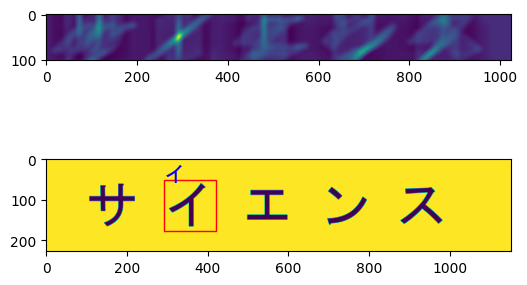

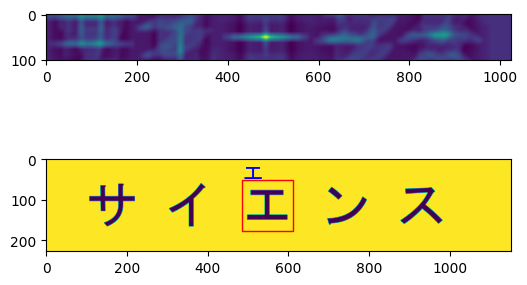

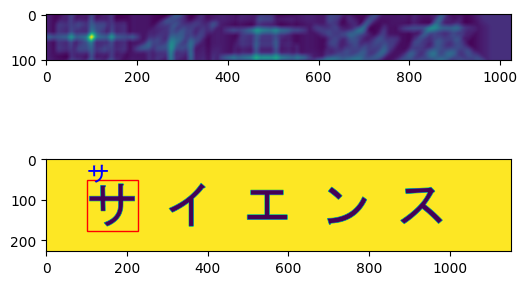

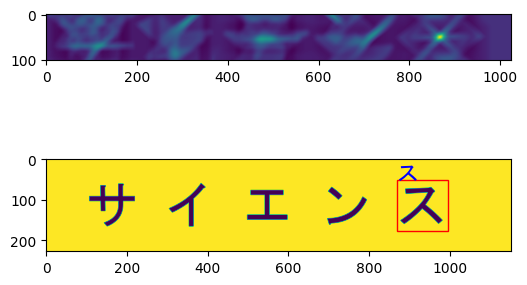

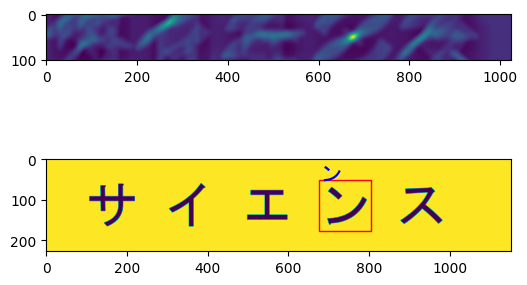

Found letter イ on x 292.
Found letter エ on x 484.
Found letter サ on x 100.
Found letter ス on x 868.
Found letter ン on x 676.
The letters in order formed a word: サイエンス
English translaction: science


In [563]:
img = load_image(f'words_jpn/auto/science.jpg')
letters_with_x_coord_pairs = find_templates_in_image(img, letter_images)
display_results(letters_with_x_coord_pairs)